In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels
import scipy
from scipy.stats import pearsonr
%matplotlib inline

In [29]:
df = pd.read_csv('global_temps.csv')
df.head()

,Source,Date,Mean
0,GCAG,2016-12-06,0.7895
1,GISTEMP,2016-12-06,0.8100
2,GCAG,2016-11-06,0.7504
3,GISTEMP,2016-11-06,0.9300
4,GCAG,2016-10-06,0.7292


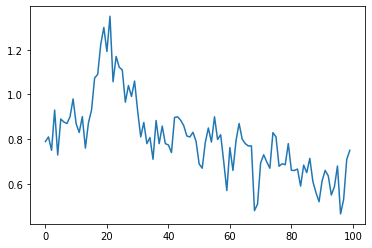

In [30]:
df.Mean[:100].plot()


In [31]:
df = df.pivot(index='Date', columns='Source', values='Mean')
df.head()

Source,GCAG,GISTEMP
Date,,
1880-01-06,0.0009,-0.30
1880-02-06,-0.1229,-0.21
1880-03-06,-0.1357,-0.18
1880-04-06,-0.0499,-0.27
1880-05-06,-0.0738,-0.14


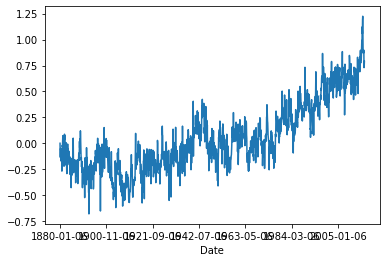

In [32]:
df.GCAG.plot()

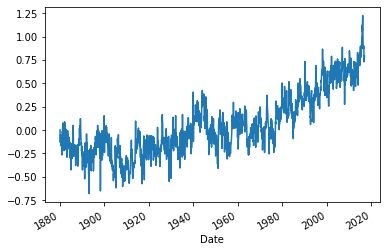

In [33]:
df.index = pd.to_datetime(df.index)
type(df.index)
df.GCAG.plot()

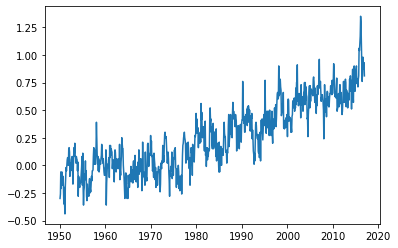

In [34]:
plt.plot(df['1950':][['GISTEMP']])

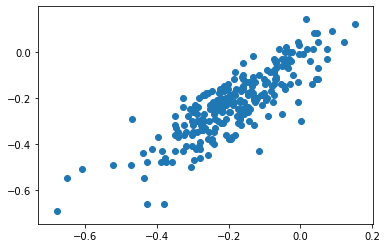

In [35]:
plt.scatter(df['1880' : '1900'][['GCAG']], df['1880':'1900'][['GISTEMP']])

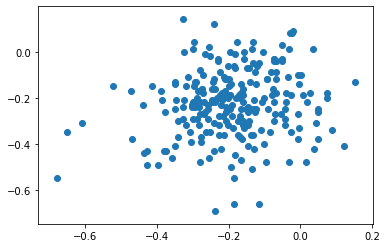

In [36]:
plt.scatter(df['1880':'1899'][['GCAG']], df['1881':'1900'][['GISTEMP']])

In [37]:
pearsonr(df['1880':'1899'].GCAG, df['1881':'1900'].GISTEMP)

(0.15464057329612757, 0.01650223473095511)

In [38]:
df['1881':'1900'][['GISTEMP']].head()

Source,GISTEMP
Date,
1881-01-06,-0.10
1881-02-06,-0.14
1881-03-06,0.01
1881-04-06,-0.03
1881-05-06,-0.04


In [39]:
min(df.index)

Timestamp('1880-01-06 00:00:00')

In [40]:
max(df.index)

Timestamp('2016-12-06 00:00:00')

In [41]:
train = df['1960':]

In [42]:
model = {
    'level': 'smooth trend', 'cycle':False, 'seasonal':None,
}

In [43]:
gcag_mod = sm.tsa.UnobservedComponents(train['GCAG'], **model)
gcag_res = gcag_mod.fit()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\structural.py:1682: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  ax.legend(handles, labels, loc=legend_loc)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\structural.py:1733: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  ax.legend(loc=legend_loc)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\structural.py:1733: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	

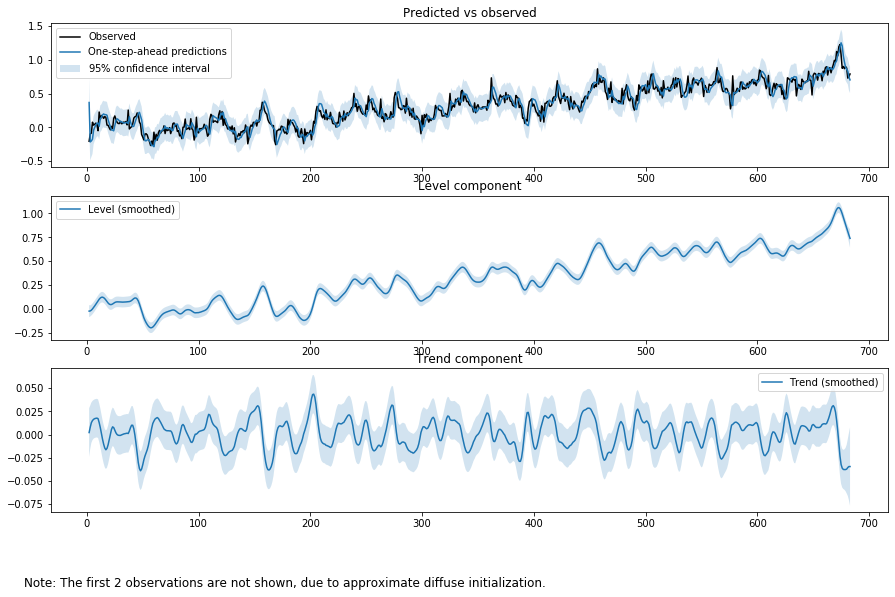

In [44]:
fig = gcag_res.plot_components(legend_loc='lower_right', figsize=(15,9 ));

In [45]:
num_steps = 20
predict_res = gcag_res.get_prediction(dynamic=train['GCAG'].shape[0] - num_steps)
predict = predict_res.predicted_mean
ci = predict_res.conf_int()

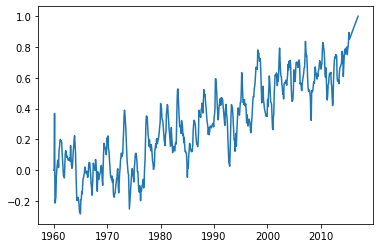

In [46]:
plt.plot(predict)

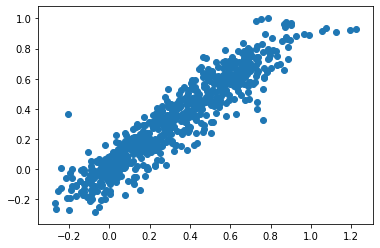

In [47]:
plt.scatter(train['GCAG'], predict)

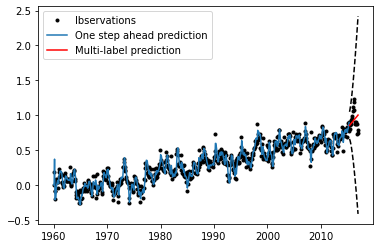

In [48]:
fig, ax = plt.subplots()
ax.plot(train['GCAG'], 'k.', label='Ibservations')
ax.plot(train.index[:-num_steps], predict[:-num_steps], label='One step ahead prediction')

ax.plot(train.index[-num_steps:], predict[-num_steps:], 'r', label='Multi-label prediction')
ax.plot(train.index[-num_steps:], ci.iloc[-num_steps:], 'k--')

legend = ax.legend(loc='upper left')

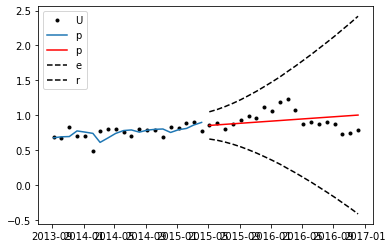

In [49]:
fig,ax = plt.subplots()

ax.plot(train.index[-40:], train['GCAG'][-40:], 'k.', label='Observations')
ax.plot(train.index[-40:-num_steps], predict[-40:-num_steps], label='One-step ahead prediction')

ax.plot(train.index[-num_steps:], predict[-num_steps:], 'r', label='Multistep prediction')
ax.plot(train.index[-num_steps:], ci.iloc[-num_steps:], 'k--')

legend = ax.legend('Upper left')

In [50]:
seasonal_model = {
    'level': 'local linear trend',
    'seasonal': 12
    
}
mod = sm.tsa.UnobservedComponents(train['GCAG'], **seasonal_model)
res = mod.fit(method='powell', disp=False)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\structural.py:1723: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\structural.py:1723: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\structural.py:1723: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])


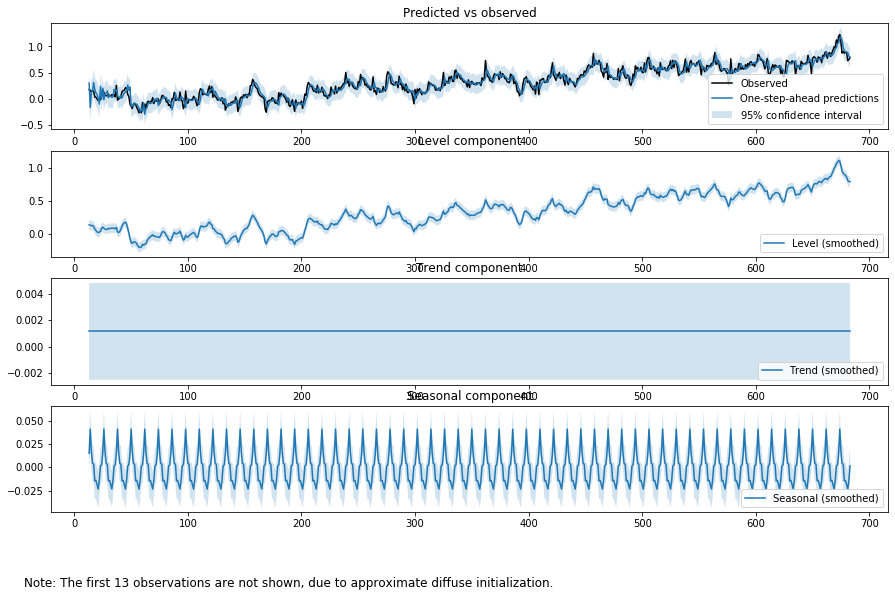

In [52]:
fig = res.plot_components(legend_loc='lower right', figsize=(15, 9))

In [53]:
pearsonr(gcag_res.predict(), train['GCAG'])

(0.9376554614814012, 3.164633553e-315)

In [57]:
np.mean(np.abs(gcag_res.predict() - train['GCAG']))

0.07721215605493972

In [59]:
np.mean(np.abs(res.predict()- train['GCAG']))

0.07203435215679338

In [62]:
seasonal_model = {
    'level': 'local level',
    'seasonal': 12
    
}
llmod = sm.tsa.UnobservedComponents(train['GCAG'], **seasonal_model)
ll_level_res = mod.fit(method='powell', disp=False)


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\structural.py:1723: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\structural.py:1723: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])


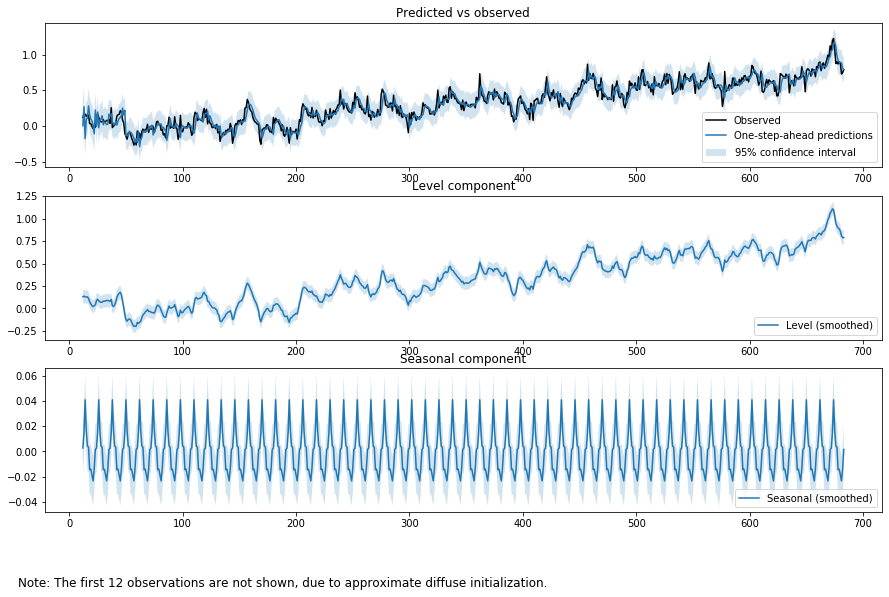

In [63]:
fig = ll_level_res.plot_components(legend_loc='lower right', figsize=(15, 9))

In [64]:
np.mean(np.abs(ll_level_res.predict()- train['GCAG']))

0.07157737862671665

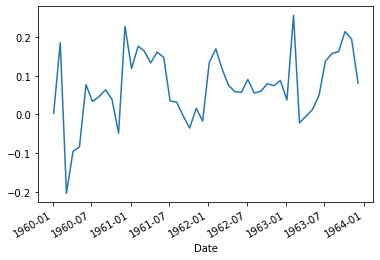

In [65]:
train[:48].GCAG.plot()

In [66]:
pearsonr(ll_level_res.predict(), train['GCAG'])

(0.9450048071803736, 0.0)

In [67]:
pearsonr(train['GCAG'].iloc[:-1, ], train['GCAG'].iloc[1:, ])

(0.9403611903118239, 4.01e-321)

In [68]:
np.mean(np.abs(ll_level_res.predict() - train['GCAG']))

0.07157737862671665

In [69]:
np.mean(np.abs(train['GCAG'].iloc[:-1, ].values, train['GCAG'].iloc[1:, ].values))

0.3475446559297218